## Importing kaggle.json file from kaggle, Make directory named kaggle and copy kaggle.json file there.



In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

 # Data is downloaded from https://www.kaggle.com/datasets/salader/dogs-vs-cats


In [ ]:

!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:09<00:00, 120MB/s]
100% 1.06G/1.06G [00:09<00:00, 123MB/s]


unzip the file

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

import required libraries, tensorflow, keras, sequential.
--Also importing conv2D for convolution layer
-- MaxPooling2D for max pooling layer, 
---Dense for creating hidden layers 
--Flatten, for flattening layers

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten 

## whole data is divided in the batches, so that it is easy to run

### -- shaping the size of image to (160, 160) so that we  can extract useful information by reucing size of image. 

### ---Reducing size of image can helps to run model fastly.

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels="inferred",
    label_mode="binary", #cat will be assigned 0, and dog 1
    batch_size=32,
    image_size=(160, 160), #whole image is set to same size
)

test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels="inferred",
    label_mode="binary", #cat will be assigned 0, and dog 1
    batch_size=32,
    image_size=(160, 160), #whole image is set to same size
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


Now, we have train dataset with 20,000 files whereas test dataset has 5000 files

In [ ]:
#Normalize, all the pixel values are set in the range 0-1
def process(image, labels):
  image = tf.cast(image/255. ,tf.float32)
  return image,labels

  train_ds = train_ds.map(process) #combining labelled  images with one folder
  test_ds = train_ds.map(process)

# creating CNN

### --1st, 2nd , 3rd convolutional layers- filters 64, filter size-3*3, padding is provided to preserve boarder information, size of image is (160,160, 3)

### --each convolutional layers followed by maxpooling with dimensions 2*2, with strides 2, and padding (maxpooling helps to extract heighest useful information).

### --than 3D images are flatten to single column values before passing to hidden layers.

### --Outer layer has one neuron, with sigmoid activation function since it is binary classificationn problem.

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', padding = "valid", input_shape=(160, 160, 3)))
model.add(MaxPooling2D((2,2), strides = 2, padding ="valid"))

model.add(Conv2D(64, (3,3), activation='relu', padding = "valid", input_shape=(160, 160, 3)))
model.add(MaxPooling2D((2,2), strides = 2, padding ="valid"))

model.add(Conv2D(64, (3,3), activation='relu', padding = "valid", input_shape=(160, 160, 3)))
model.add(MaxPooling2D((2,2), strides = 2, padding ="valid"))

model.add(Conv2D(128, (3,3), activation='relu', padding = "valid", input_shape=(160, 160, 3)))
model.add(MaxPooling2D((2,2), strides = 2, padding ="valid"))


model.add(Flatten())

model.add(Dense(128, activation='relu', input_shape=(160, 160, 3))) 
model.add(Dense(64, activation='relu', input_shape=(160, 160, 3)))

model.add(Dense(1,activation='sigmoid')) 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 158, 158, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 79, 79, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 77, 77, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 36, 36, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

### --  keras compile() method is used to compile the model.
### --  optimizer optimizes the input weights by comparing the predictions and the loss functions

### --metrices is used to evaluate the performance the model.

### --loss function is used to find the error

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Trains the model for a fixed number of epochs (iterations on a dataset).

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
625/625 [==============================] - 859s 1s/step - loss: 0.7653 - accuracy: 0.6179 - val_loss: 0.6345 - val_accuracy: 0.6638
Epoch 2/10
625/625 [==============================] - 847s 1s/step - loss: 0.5350 - accuracy: 0.7316 - val_loss: 0.4975 - val_accuracy: 0.7586
Epoch 3/10
625/625 [==============================] - 834s 1s/step - loss: 0.4454 - accuracy: 0.7925 - val_loss: 0.4812 - val_accuracy: 0.7922
Epoch 4/10
625/625 [==============================] - 833s 1s/step - loss: 0.3916 - accuracy: 0.8231 - val_loss: 0.4358 - val_accuracy: 0.8148
Epoch 5/10
144/625 [=====>........................] - ETA: 10:01 - loss: 0.3469 - accuracy: 0.8487

In [ ]:
#plotting line graph accuracy train data vs validation data
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

we can see that accuracy of the train dataset is more than validation data set as epoch increases, clearly indication of overfit.

Lets see the lost function of train and validation dataset


In [ ]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'],color='blue', label='validation')
plt.legend()
plt.show()

we can see the loss of training dataset is decreasing but validation dataset is increasing as epoch increaes, which is the clear indication of the overfit.

There are different ways we can reduce overfitting. Some of them are-



1. Adding more data- we could not do this, as we have already used our whole  data.
2. Data Augumentation
3. Regularization
4. Dropout
5. Batch Normalization
6. Reduce complexity of the model

## --We are using Batch normalization and drop out.
### --Normalization speed up the learning. The internal covariate shift is a change in the input distribution of an internal layer of a Neural Network, batch normalization reduces that also.

### --The Dropout layer is a mask that nullifies the contribution of some neurons towards the next layer and leaves unmodified all others.

In [ ]:
from keras.layers import BatchNormalization, Dropout

In [16]:
# create CNN model

model = Sequential()

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(160,160,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

#Intermediate layers
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))

#Output layer
model.add(Dense(1,activation='sigmoid'))

In [17]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 158, 158, 64)      1792      
                                                                 
 batch_normalization_4 (Batc  (None, 158, 158, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 79, 79, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 77, 77, 128)       73856     
                                                                 
 batch_normalization_5 (Batc  (None, 77, 77, 128)      512       
 hNormalization)                                                 
                                                      

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
625/625 [==============================] - 53s 82ms/step - loss: 0.6390 - accuracy: 0.6651 - val_loss: 0.6685 - val_accuracy: 0.6934
Epoch 2/10
625/625 [==============================] - 50s 80ms/step - loss: 0.4584 - accuracy: 0.7838 - val_loss: 0.7388 - val_accuracy: 0.6086
Epoch 3/10
625/625 [==============================] - 50s 79ms/step - loss: 0.3451 - accuracy: 0.8454 - val_loss: 0.5363 - val_accuracy: 0.7648
Epoch 4/10
625/625 [==============================] - 50s 80ms/step - loss: 0.2631 - accuracy: 0.8865 - val_loss: 0.3757 - val_accuracy: 0.8360
Epoch 5/10
625/625 [==============================] - 51s 81ms/step - loss: 0.1987 - accuracy: 0.9168 - val_loss: 0.2983 - val_accuracy: 0.8790
Epoch 6/10
625/625 [==============================] - 50s 79ms/step - loss: 0.1515 - accuracy: 0.9378 - val_loss: 0.3064 - val_accuracy: 0.8892
Epoch 7/10
625/625 [==============================] - 50s 80ms/step - loss: 0.1166 - accuracy: 0.9530 - val_loss: 0.7807 - val_accuracy:

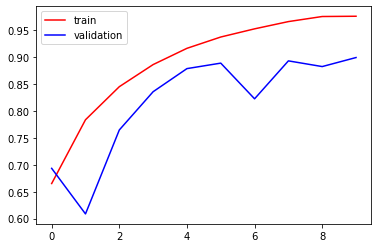

In [20]:
#plotting line graph accuracy train data vs validation data
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

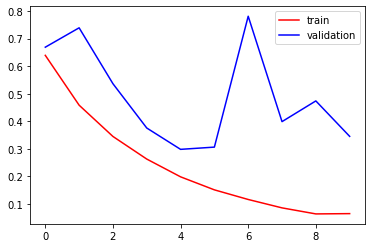

In [21]:
#plotting loss graph for training and validation data set
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'],color='blue', label='validation')
plt.legend()
plt.show()

In [ ]:
#Now I will download 2 images of cat and dog from google and check wether model could identify or not.

In [22]:
import cv2

In [25]:
test_image = cv2.imread('/content/dog.jpg')

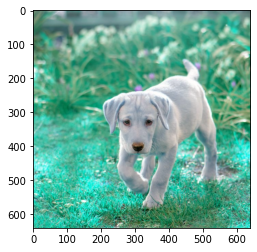

In [26]:
plt.imshow(test_image)

In [27]:
test_image.shape

(641, 640, 3)

In [28]:
test_image = cv2.resize(test_image,(160,160))
test_image_input = test_image.reshape((1,160,160,3))

In [29]:
import numpy as np
pred = model.predict(test_image_input)
result = np.where(pred>0.5, "It is a Dog", "It is a Cat")
print(result)

1/1 [==============================] - 0s 311ms/step
[['It is a Dog']]


In [36]:
test_image = cv2.imread('/content/cat.jpg')

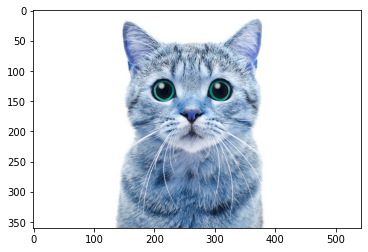

In [37]:
plt.imshow(test_image)

In [38]:
test_image = cv2.resize(test_image,(160,160))
test_image_input = test_image.reshape((1,160,160,3))


In [39]:
import numpy as np
pred = model.predict(test_image_input)
result = np.where(pred>0.5, "It is a Dog", "It is a Cat")
print(result)

1/1 [==============================] - 0s 55ms/step
[['It is a Cat']]
